In [10]:
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import * 
print('Imported Successfully!')
import glob

Imported Successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [12]:
!ls gdrive/MyDrive

ls: cannot access 'gdrive/MyDrive': No such file or directory


In [6]:
!nvidia-smi

Mon Oct 11 03:46:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 11 kB/s 


In [13]:
train_path='/content/drive/MyDrive/CovidDataset/Train'
test_path='/content/drive/MyDrive/CovidDataset/Val'

In [ ]:
import cv2
covid = cv2.imread("/content/drive/MyDrive/CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")
covid


In [35]:
covid

array([[[182, 182, 182],
        [169, 169, 169],
        [152, 152, 152],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[165, 165, 165],
        [150, 150, 150],
        [138, 138, 138],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[146, 146, 146],
        [134, 134, 134],
        [128, 128, 128],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[243, 243, 243],
        [244, 244, 244],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

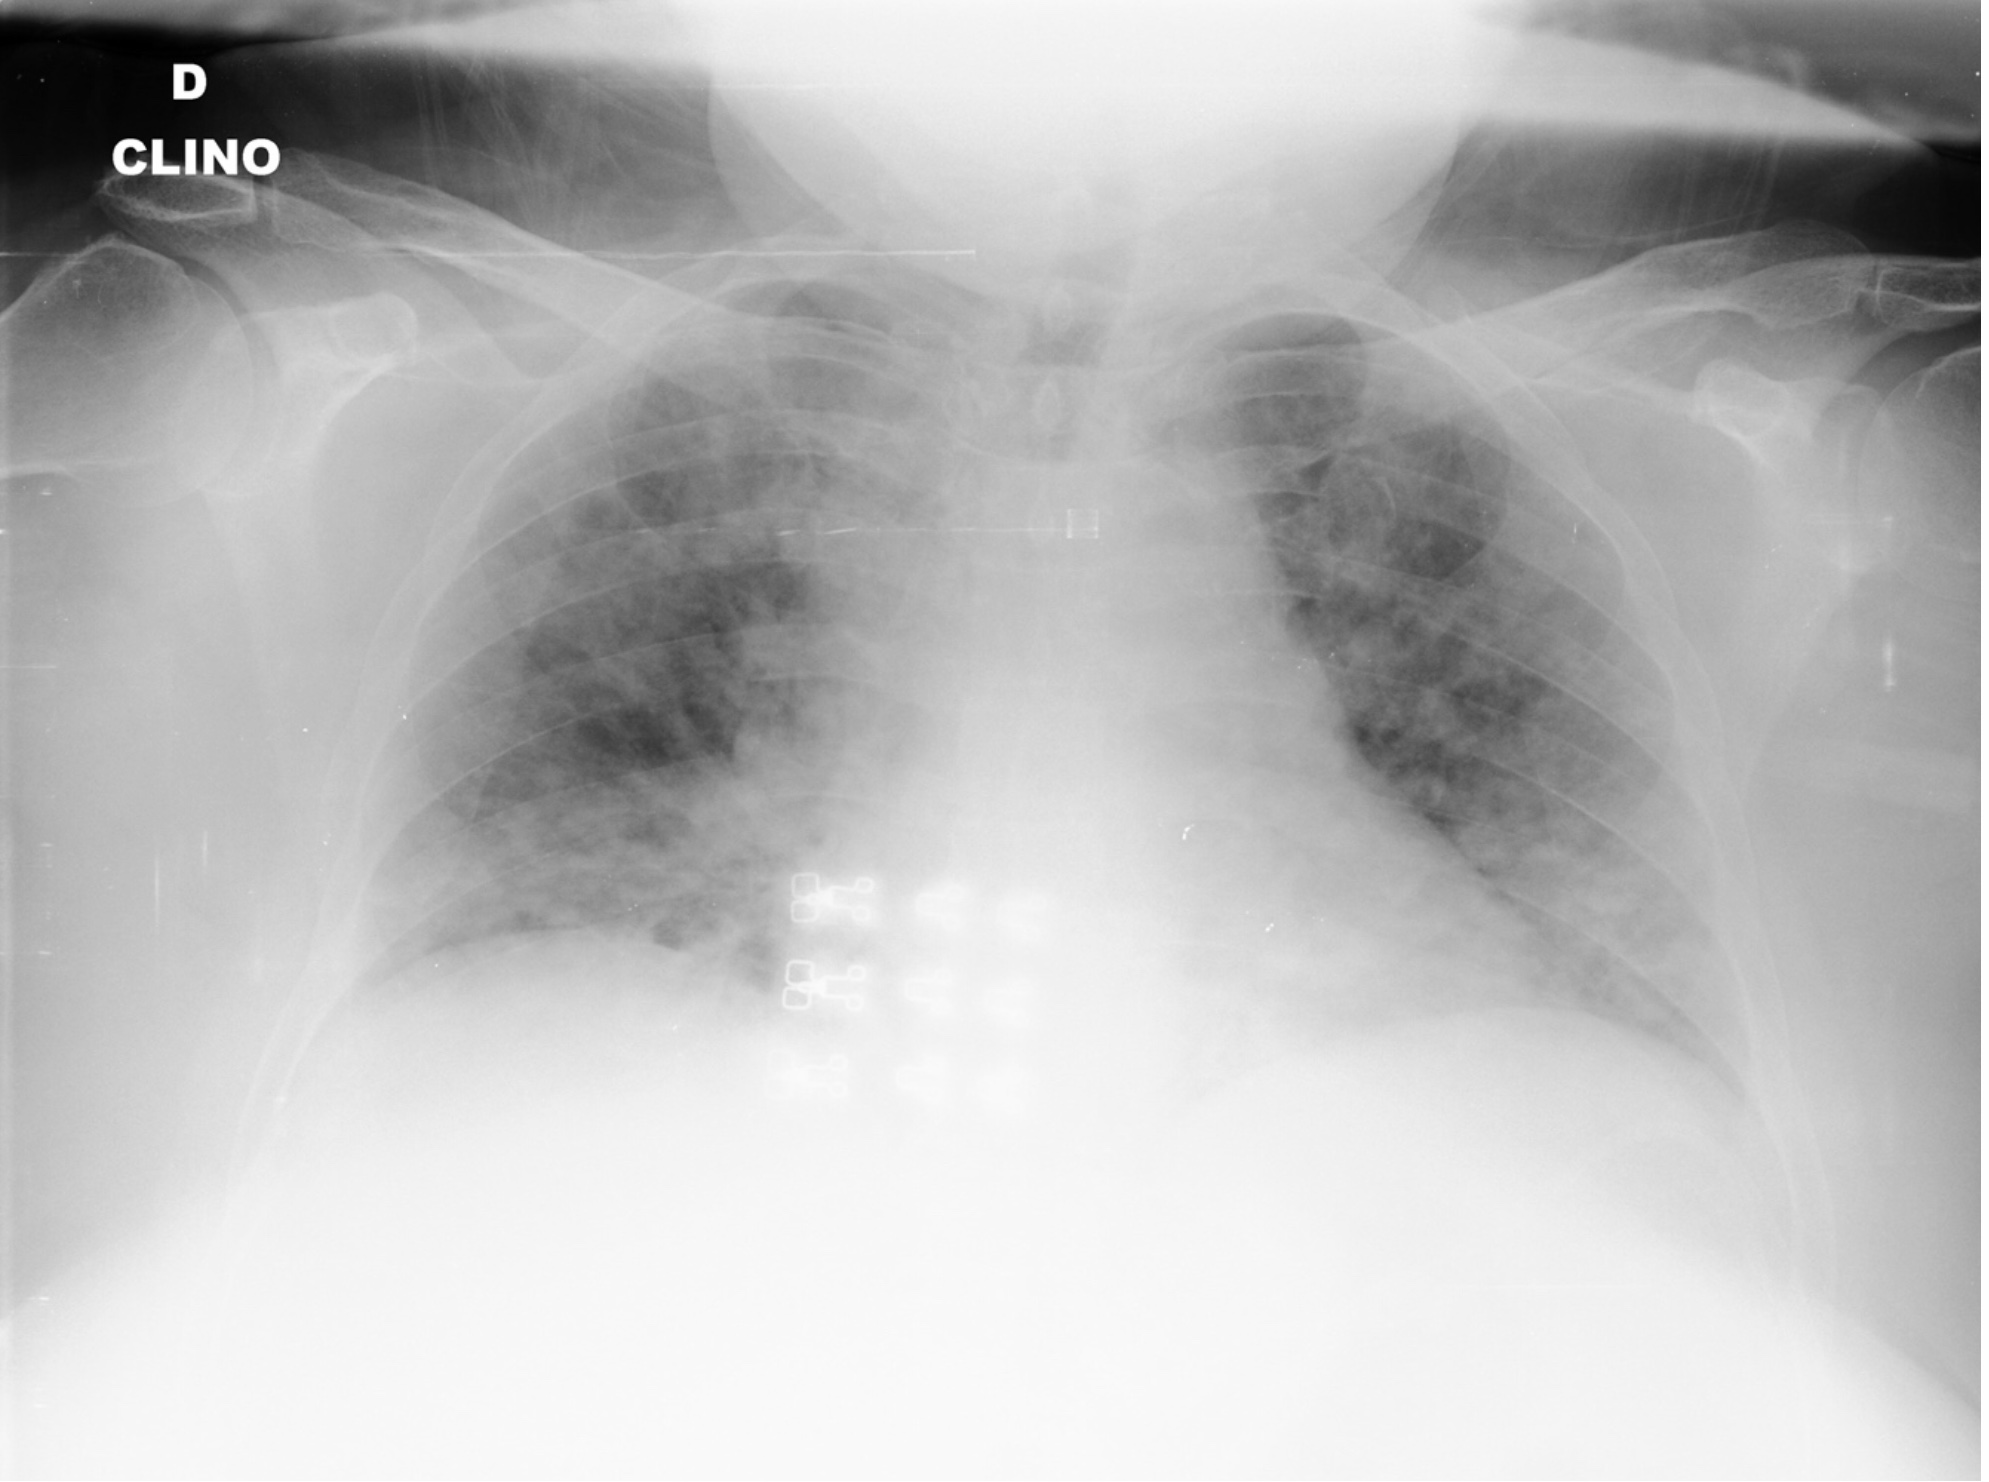

In [37]:
from IPython.display import Image
Image('/content/drive/MyDrive/CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')



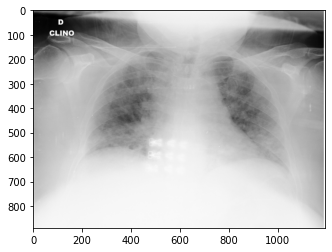

In [47]:
scale = 60 # percent of original size
width = int(covid.shape[1] * scale / 100)
height = int(covid.shape[0] * scale / 100)
dim = (width, height)
smaller_image = cv2.resize(covid,dim,interpolation=cv2.INTER_AREA)
plt.imshow(smaller_image)

In [48]:
non_covid=cv2.imread("/content/drive/MyDrive/CovidDataset/Train/Normal/IM-0156-0001.jpeg")

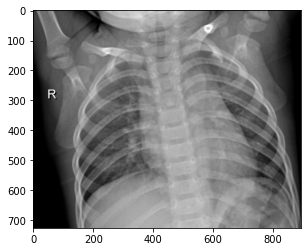

In [49]:
scale = 60 # percent of original size
width = int(non_covid.shape[1] * scale / 100)
height = int(non_covid.shape[0] * scale / 100)
dim = (width, height)
smaller_image = cv2.resize(non_covid,dim,interpolation=cv2.INTER_AREA)
plt.imshow(smaller_image)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 128)      

In [16]:
folders=glob.glob('/content/drive/MyDrive/CovidDataset/Train/*')

In [17]:
folders

['/content/drive/MyDrive/CovidDataset/Train/Normal',
 '/content/drive/MyDrive/CovidDataset/Train/Covid']

In [18]:
train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

print('Created the Data Generator Objects.')

Created the Data Generator Objects.


In [19]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Train',target_size=(224,224),batch_size=32, class_mode="binary")


Found 224 images belonging to 2 classes.


In [20]:
val_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Val',target_size=(224,224),batch_size=32, class_mode="binary")

Found 60 images belonging to 2 classes.


In [27]:
history = model.fit(train_generator, epochs = 6, validation_data=val_generator, validation_steps=2,verbose=1)

Epoch 1/6
7/7 [==============================] - 13s 2s/step - loss: 0.2508 - accuracy: 0.9152 - val_loss: 0.1609 - val_accuracy: 0.9667
Epoch 2/6
7/7 [==============================] - 12s 2s/step - loss: 0.1563 - accuracy: 0.9464 - val_loss: 0.0995 - val_accuracy: 0.9667
Epoch 3/6
7/7 [==============================] - 11s 2s/step - loss: 0.1746 - accuracy: 0.9152 - val_loss: 0.1075 - val_accuracy: 0.9667
Epoch 4/6
7/7 [==============================] - 11s 2s/step - loss: 0.2003 - accuracy: 0.9286 - val_loss: 0.1497 - val_accuracy: 0.9667
Epoch 5/6
7/7 [==============================] - 11s 2s/step - loss: 0.1791 - accuracy: 0.9286 - val_loss: 0.0828 - val_accuracy: 0.9833
Epoch 6/6
7/7 [==============================] - 11s 2s/step - loss: 0.1272 - accuracy: 0.9554 - val_loss: 0.1763 - val_accuracy: 0.9667


In [22]:
nb_epoch = 6

In [30]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


In [32]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

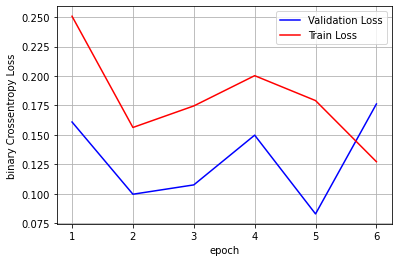

In [33]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)